In [1]:
# Import necessary libraries for data manipulation, machine learning, and visualization
import pandas as pd  # pandas for data manipulation (handling data frames)
import numpy as np  # numpy for numerical operations (arrays, matrices, etc.)
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and test sets
from sklearn.datasets import load_breast_cancer  # To load the breast cancer dataset (example dataset)
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes classifier for classification
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier for classification
import seaborn as sns  # seaborn for data visualization (beautiful statistical plots)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics for model performance
from sklearn.preprocessing import StandardScaler  # For feature scaling (standardizing features)
import matplotlib.pyplot as plt  # matplotlib for creating visualizations (like plots and graphs)

# This line allows the plots to appear inline in Jupyter notebooks (displayed directly below the code cells)
# %matplotlib inline

# Set the default style of seaborn plots to 'darkgrid' (dark background with gridlines for better readability)
sns.set_style('darkgrid')

# Set pandas to display all columns in a dataframe (useful for viewing wide datasets without truncation)
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('/kaggle/input/heartdiseasesdata/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# overview of the columns:<br>1. 
age: Age of the patient<br>.2. 
sex: Sex of the patient (1 = male, 0 = female<br>)3. .
cp: Chest pain type (1, 2, 3, or 4, each representing different types of chest pai<br>n4. ).
trestbps: Resting blood pressure (in mm <br>H5. g).
chol: Serum cholesterol level (in mg<br>/6. dl).
fbs: Fasting blood sugar (1 = > 120 mg/dl, 0 = other<br>w7. ise).
restecg: Resting electrocardiographic results (values typically range from 0<br> 8. to 2).
thalach: Maximum heart rate a<br>c9. hieved.
exang: Exercise induced angina (1 = yes,<br> 10. 0 = no).
oldpeak: ST depression induced by exercise relativ<br>e11.  to rest.
slope: Slope of the peak exercise <br>S12. T segment.
ca: Number of major vessels colored by <br>f13. luoroscopy.
thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = revers<br>a14. ble defect).
target: Presence or absence of heart disease (1 = presence, 0 = absence).

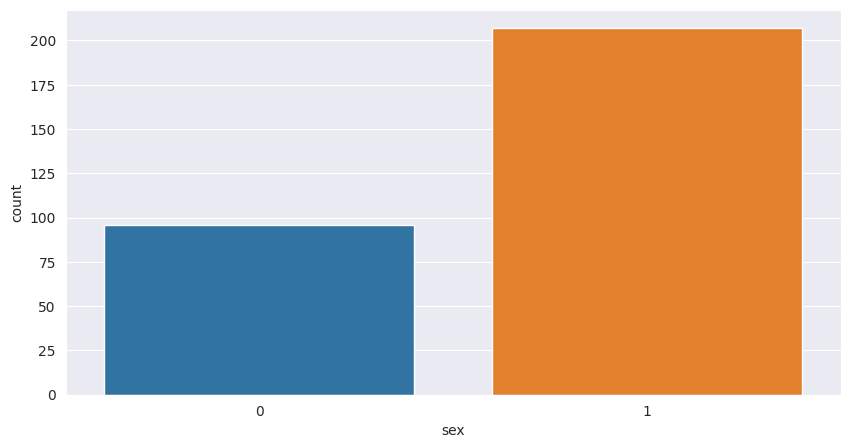

In [4]:
## value counts of column age

plt.figure(figsize=(10, 5))
sns.countplot(x='sex', data=df);

 0 is for female and 1 for male as we can see that from graph there is more male heart patient and female heart patient.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

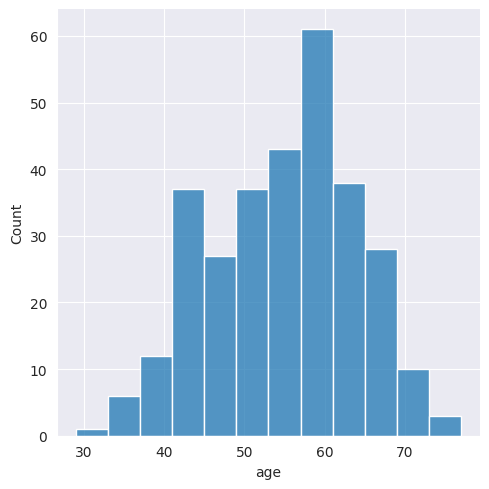

In [5]:
## distribution plot of column age

plt.figure(figsize=(10,10))
sns.displot(df['age'])

As we can see there are more heart patient at the age of 60 and in between age 50-60

<Axes: >

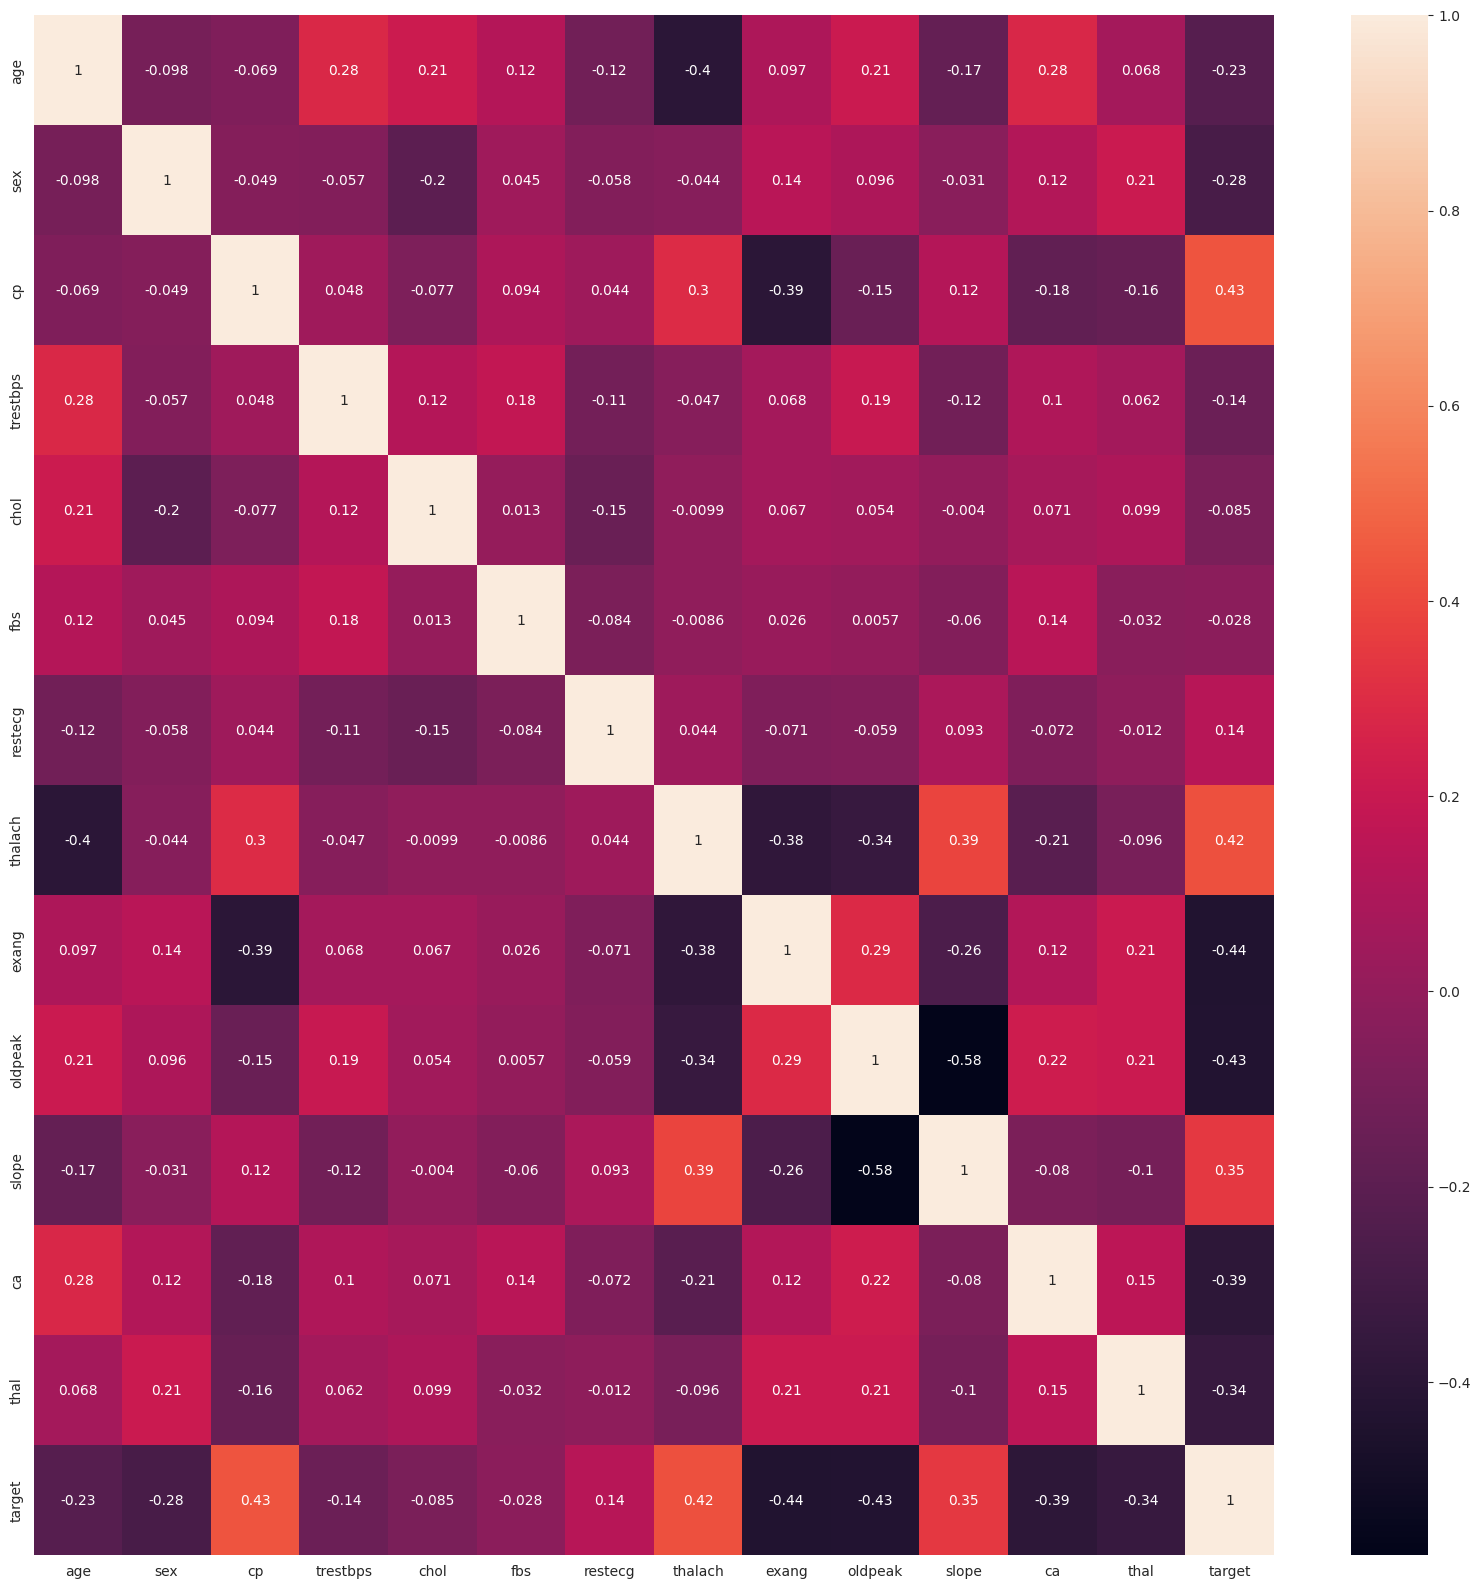

In [6]:
## correlation of features

# Set the figure size for the heatmap
# 'figsize=(20, 20)' specifies the dimensions of the plot (width and height in inches). 
# This makes the heatmap large and easy to read, especially when there are many variables.
plt.figure(figsize=(20, 20))

# Create a heatmap to visualize the correlation between the features in the dataset
# 'df.corr()' computes the pairwise correlation of all columns in the DataFrame.
# The correlation values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).
# 'annot=True' displays the correlation values in each cell of the heatmap for clarity.
sns.heatmap(df.corr(), annot=True)


Key Insights from the Correlation Heatmap:
Strong Correlations:

Target (Heart Disease) & Exang (Exercise-Induced Angina): There is a strong positive correlation (0.42), indicating that patients who experience exercise-induced angina are more likely to have heart disease. This suggests that exercise-induced angina could be an important predictor for the presence of heart disease.
Thalach (Max Heart Rate) & Target (Heart Disease): A negative correlation (-0.39) between max heart rate (thalach) and the target indicates that people with higher maximum heart rates during exercise are less likely to have heart disease. This makes sense, as a higher maximum heart rate typically indicates better cardiovascular fitness.
Oldpeak & Slope: Oldpeak (ST depression induced by exercise) and Slope (slope of the peak exercise ST segment) show a strong negative correlation (-0.58). This suggests that people with more significant ST depression tend to have a lower slope of the exercise ST segment, which could be indicative of more severe heart conditions.
Moderate Correlations:

Age & Cholesterol (chol): There is a weak correlation (0.28), suggesting that older individuals might have slightly higher cholesterol levels, though it's not a very strong relationship.
Exang & Thalach: A small negative correlation (-0.26) suggests that people with exercise-induced angina tend to have lower maximum heart rates during exercise, which is consistent with the condition.
Weak to No Correlation:

Sex & Target: There is almost no correlation (0.01) between sex and the presence of heart disease (target). This suggests that gender alone does not strongly predict the presence of heart disease in this dataset, although it may still play a role when combined with other factors.
Fbs (Fasting Blood Sugar) & Target: There seems to be little to no correlation between fasting blood sugar and the target variable. This implies that fasting blood sugar alone may not be a strong indicator of heart disease.
Weak to Moderate Feature Relationships:

Cholesterol (chol) & Resting Blood Pressure (trestbps): There is a weak positive correlation (0.19) between cholesterol and resting blood pressure, suggesting a slight tendency for higher cholesterol to be associated with higher blood pressure.
Age & Blood Pressure (trestbps): There is a weak correlation (0.12) between age and resting blood pressure, which may indicate that older individuals tend to have higher resting blood pressure, but it is not a strong trend.
The Story This Heatmap Tells:
Exercise-Induced Angina (Exang) and Maximum Heart Rate (Thalach) are important indicators of heart disease. This suggests that fitness levels and exercise responses play a key role in determining heart health.
Oldpeak and Slope (measures related to exercise ST depression) are strongly related, which might help in predicting the severity of heart disease.
Age and Cholesterol are weakly correlated, and older individuals tend to have higher cholesterol levels. However, this is a minor correlation and would need further analysis to be considered a key risk factor.
Sex has very little correlation with the target variable (heart disease), implying that in this dataset, gender may not be a significant factor when considered alone. Other features like exercise-induced angina or maximum heart rate could provide more insights.
Fasting Blood Sugar and Resting Blood Pressure do not show strong relationships with heart disease, suggesting that they may not be as significant predictors when other factors are considered.
How to Use the Heatmap:
Feature Selection:

You might want to focus on Exang, Thalach, and Oldpeak when building a predictive model, as they show stronger correlations with heart disease.
Remove or combine features that are highly correlated (e.g., Oldpeak and Slope) to reduce multicollinearity in models.
Model Building:

Features like Age, Cholesterol, Exang, and Thalach can be used to predict heart disease, as they show moderate to strong correlations with the target variable.
Clinical Implications:

In a healthcare context, the findings could suggest that people who experience exercise-induced angina and have lower heart rates during exercise are more likely to suffer from heart disease.
Monitoring ST depression during exercise could provide useful insights into heart health.

How to Read and Interpret the Correlation Heatmap:
Understanding Correlation:

Positive Correlation: When two features have a positive correlation, as one increases, the other tends to increase as well. The correlation value will range from 0 to 1. Values closer to 1 indicate a strong positive correlation, while values closer to 0 indicate little to no correlation.
Negative Correlation: When two features have a negative correlation, as one increases, the other tends to decrease. The correlation value will range from -1 to 0. Values closer to -1 indicate a strong negative correlation, while values closer to 0 indicate little to no correlation.
No Correlation: If two features have a correlation close to 0, it means there is little or no linear relationship between them.
Color Scale:

The color scale on the right shows the range of correlation values. Darker shades (toward red) represent stronger positive correlations, while lighter shades (toward white) represent weaker correlations. Negative correlations are typically shown in shades toward purple/blue.
Diagonal:

The diagonal cells (from top left to bottom right) show a perfect correlation of 1 because each feature is perfectly correlated with itself.
Key Insights from the Heatmap:
Strong Positive Correlations:

For example, features like "thalach" (maximum heart rate) and "age" may show a stronger positive correlation.
Features like "oldpeak" (ST depression induced by exercise) and "slope" could show strong positive or negative relationships with other variables.
Weak or No Correlation:

Features like "fbs" (fasting blood sugar) and "ca" (number of major vessels colored by fluoroscopy) may show weaker correlations with other features.
How to Tell the Story Using This Heatmap:
Explaining Relationships:

Focus on pairs of variables that show strong positive or negative correlations. For example, if age is strongly positively correlated with trestbps (resting blood pressure), you can explain that older individuals may tend to have higher resting blood pressure.
If exang (exercise-induced angina) is negatively correlated with thalach (maximum heart rate), you could suggest that those with exercise-induced angina may have lower maximum heart rates.
Identifying Multicollinearity:

If two or more features are highly correlated (e.g., above 0.8 or -0.8), this might suggest multicollinearity. In machine learning models, multicollinearity can lead to instability and unreliable results. You can potentially remove or combine these features.
Predictive Modeling:

Use the heatmap to identify which features might be important for predictive modeling. For example, if "target" (indicating presence of heart disease) is highly correlated with "thalach" (maximum heart rate) or "oldpeak", these features might be key predictors for heart disease.
Handling Outliers and Data Transformation:

The heatmap can also highlight relationships where certain variables might need transformations or where data cleaning might be necessary (e.g., if there's an unexpected correlation between features that should be independent).
How to Use the Heatmap:
Initial Exploration: The heatmap is often one of the first tools used in exploratory data analysis (EDA). It provides quick insights into the relationships between features, which can inform decisions about feature selection and engineering.

Feature Selection: Highly correlated features may not both be necessary for predictive modeling, so you can decide whether to drop one of them, combine them, or apply dimensionality reduction techniques like Principal Component Analysis (PCA).

Model Understanding: When building machine learning models, understanding correlations can help you understand which features might be influential in predicting the target variable and whether some features might cause multicollinearity issues.

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


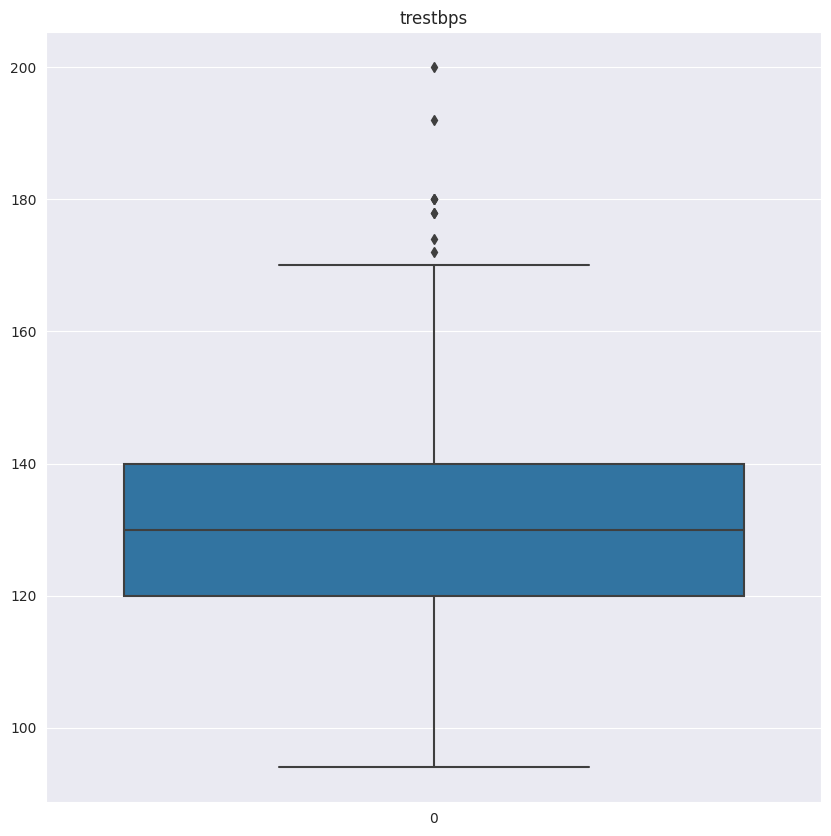

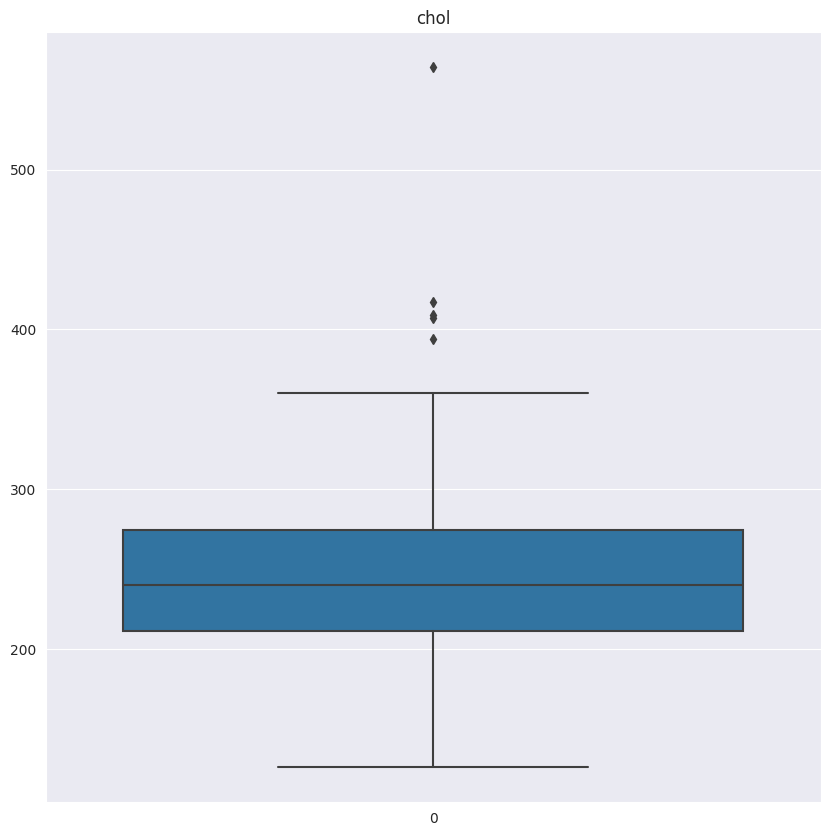

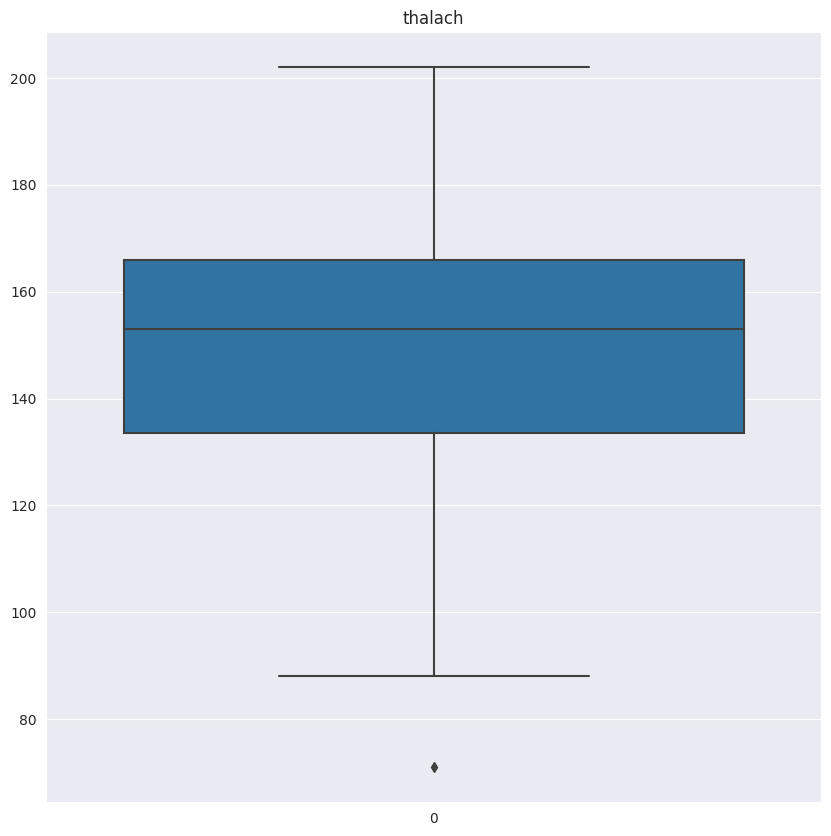

In [8]:
## checking outliers

# Loop through a list of selected features to visualize their distributions
for f in ['trestbps', 'chol', 'thalach']:
    
    # Create a new figure for each feature with a size of 10x10 inches
    # 'plt.figure(figsize=(10, 10))' sets the figure size to ensure the boxplot is displayed clearly
    plt.figure(figsize=(10, 10))

    # Create a boxplot for the feature 'f' (which will be 'trestbps', 'chol', or 'thalach')
    # sns.boxplot(df[f]) generates a boxplot for each feature in the DataFrame `df`
    sns.boxplot(df[f])

    # Add a title to the plot that corresponds to the current feature being plotted
    # The title will be dynamically set to the name of the feature 'f'
    plt.title(f)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x1000 with 0 Axes>

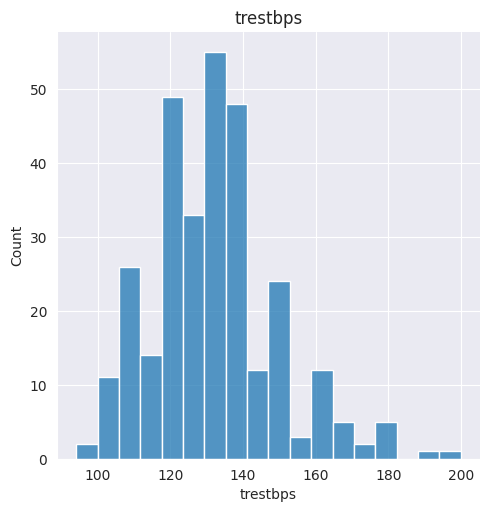

<Figure size 1000x1000 with 0 Axes>

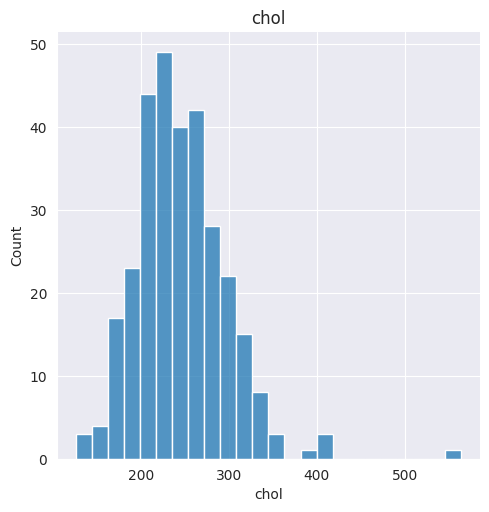

<Figure size 1000x1000 with 0 Axes>

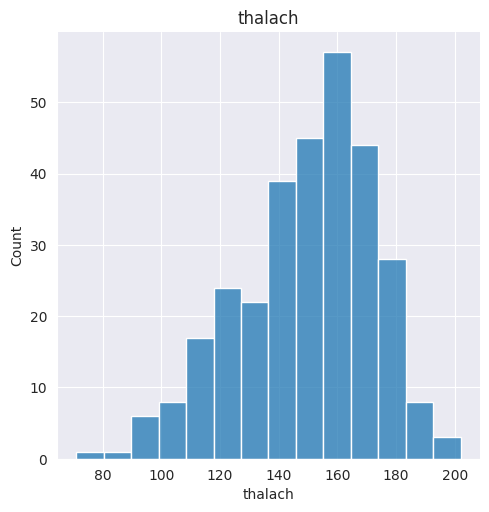

In [9]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.displot(df[f])
    plt.title(f)

In [10]:
## most of the columns are following gaussian distribution, so we are going to remove outliers with 3rd std

def remove_outliers(df, feature):
    lower_bound = df[feature].mean() - (3 * df[feature].std())
    upper_bound = df[feature].mean() + (3 * df[feature].std())
    
    df.loc[df[feature] < lower_bound, feature] = lower_bound
    df.loc[df[feature] > upper_bound, feature] = upper_bound

In [11]:
for f in ['trestbps', 'chol', 'thalach', 'age']:
    remove_outliers(df, f)

/tmp/ipykernel_30/4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.00933393568633' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/tmp/ipykernel_30/4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '90.77177343885018' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/tmp/ipykernel_30/4152397341.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.93138134172638' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < lower_bound, feature] = lower_bound
/tmp/ipykerne

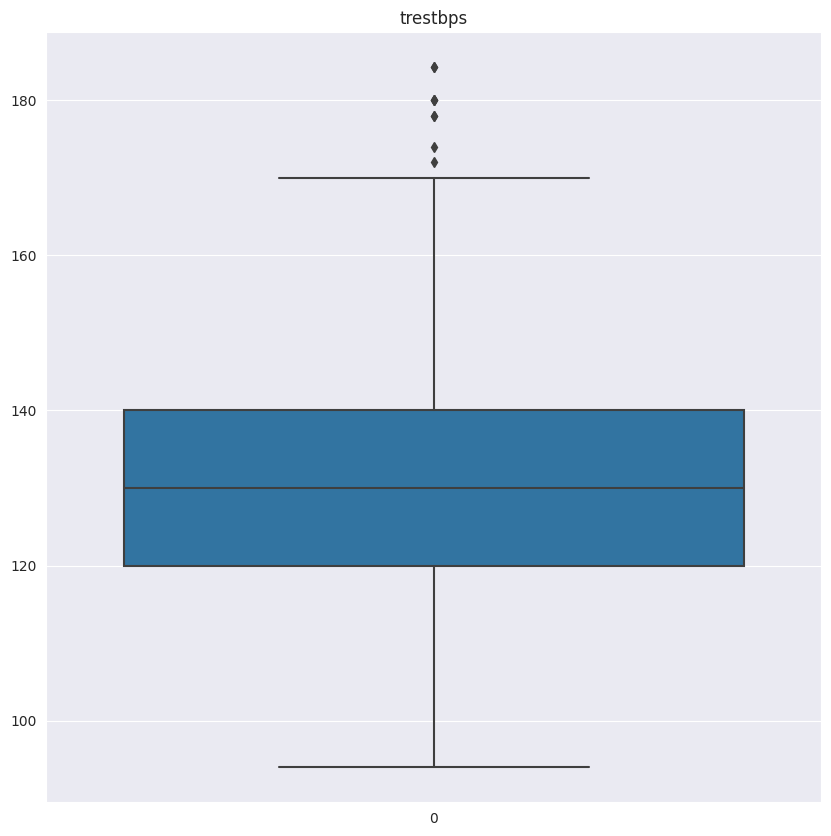

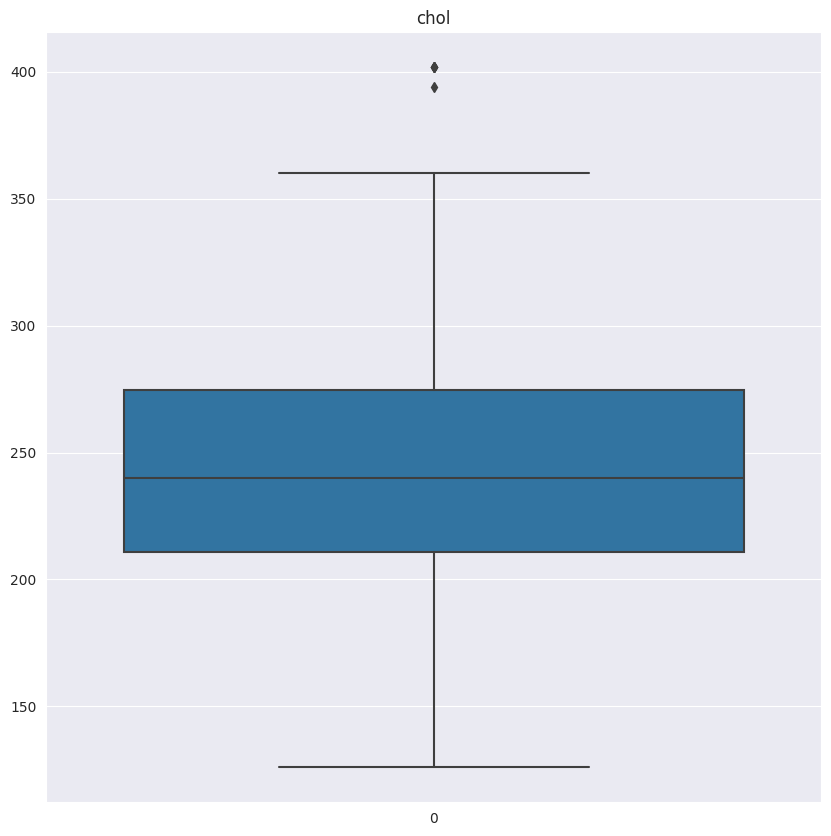

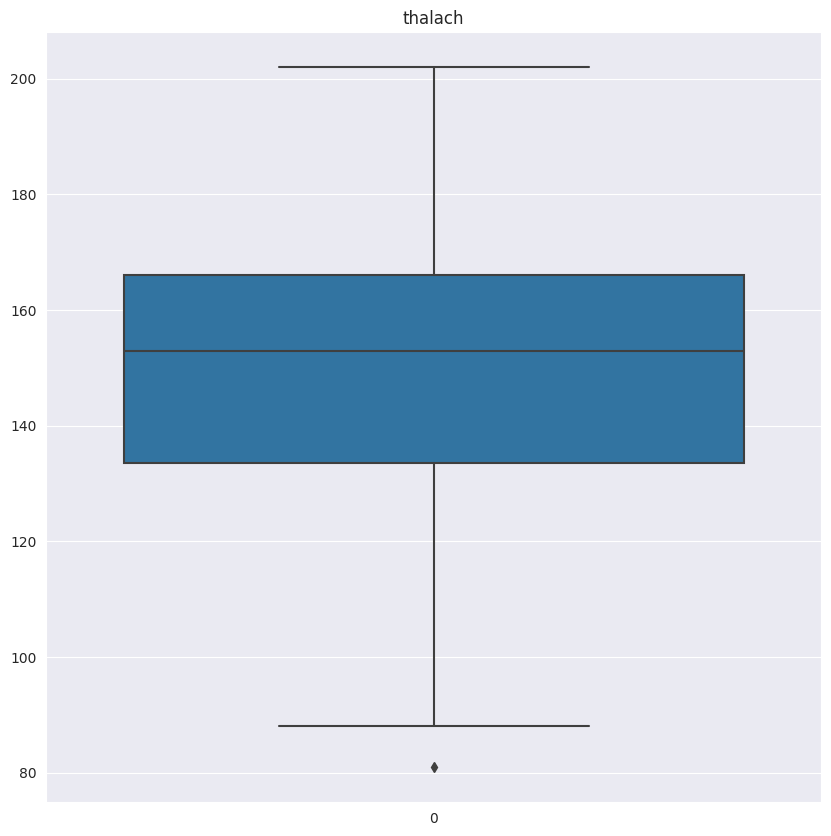

In [12]:
for f in ['trestbps', 'chol', 'thalach']:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df[f])
    plt.title(f)

In [13]:
remove_outliers(df, 'age')

In [14]:
## dependent and independent features

# Select all rows and all columns except the last one (features) from the DataFrame `df`
# 'df.iloc[:, :-1]' selects all rows (:) and all columns except the last one (:-1) for the feature set (X)
X = df.iloc[:, :-1]

# Select the last column (target variable) from the DataFrame `df` for the target (y)
# 'df.iloc[:, -1]' selects all rows (:) and only the last column (-1) as the target variable
y = df.iloc[:, -1]

## converting X and y into numpy array's

# Convert the features DataFrame `X` into a numpy array using the `.values` attribute
# This is useful for machine learning models that typically work with numpy arrays rather than pandas DataFrames
X = X.values

# Convert the target Series `y` into a numpy array using the `.values` attribute
# Again, this is to ensure that the target is in a format (numpy array) that machine learning models can process
y = y.values


In [15]:
## scaling the data 

sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
## splitting the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
## logistic Regression

lg = LogisticRegression()

In [18]:
lg.fit(X_train, y_train)

LogisticRegression()

In [20]:
preds = lg.predict(X_test)
pd.DataFrame({'Acutual': y_test, 'Predicted': preds})

,Acutual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
71,1,1
72,0,1
73,1,1
74,0,0


------------------------------------------------Accuracy Score-------------------------------------------------------
0.8421052631578947
------------------------------------------Classfication Report--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

----------------------------------------------------------Confusion Matrix---------------------------------------------


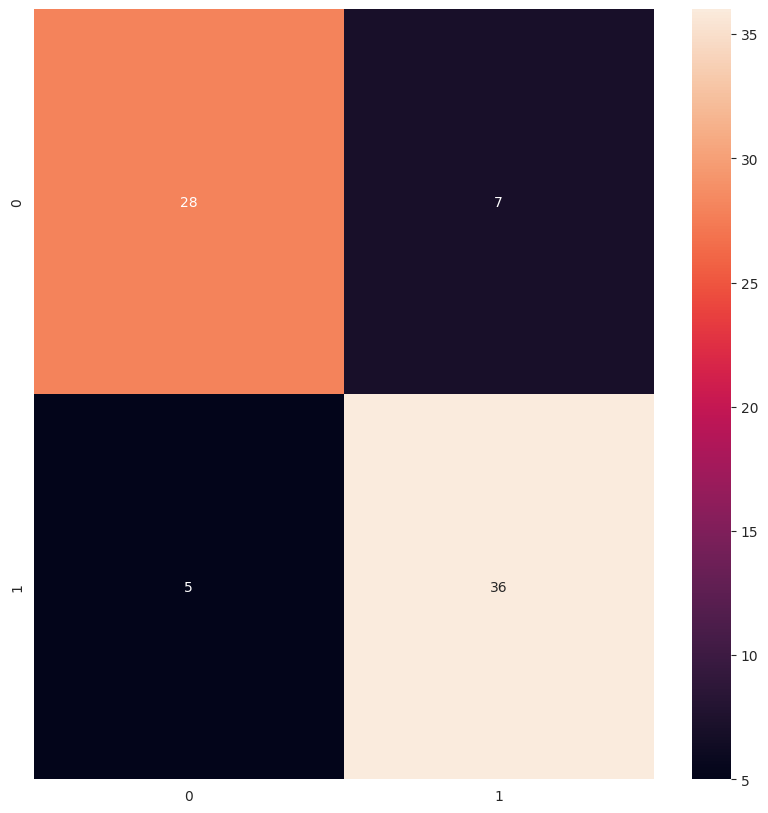

In [21]:
print("------------------------------------------------Accuracy Score-------------------------------------------------------")
print(accuracy_score(y_test, preds))

print("------------------------------------------Classfication Report--------------------------------------------------------")
print(classification_report(y_test, preds))

print("----------------------------------------------------------Confusion Matrix---------------------------------------------")
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, preds), annot=True);